# **Problem 2 Defination**

Utilize PCA to analyze demographic and socio-economic data from the Indian Census to uncover significant patterns that can guide effective policy-making and resource allocation.

Goals:

Reduce Data Dimensionality: Apply PCA to simplify the high-dimensional census data by identifying principal components that capture the most critical variations.

Insight Extraction: Interpret these principal components to understand key socio-economic and demographic factors impacting the population.

Policy Recommendations: Provide actionable insights and recommendations based on the PCA results to assist policymakers in targeted decision-making and interventions.

Outcome: The analysis will reveal essential patterns in the census data, aiding in the creation of informed strategies to address the diverse needs of the population. This approach aims to facilitate data-driven policymaking by highlighting core areas for resource focus and intervention.



# **Check shape, Data types, statistical summary**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("PCA+India+Data_Census (1).xlsx")

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Display a statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Display the first few rows to get a glimpse of the data
print("\nFirst few rows of the dataset:")
print(df.head())

Shape of the dataset: (640, 61)

Data Types:
State Code        int64
Dist.Code         int64
State            object
Area Name        object
No_HH             int64
                  ...  
MARG_HH_0_3_F     int64
MARG_OT_0_3_M     int64
MARG_OT_0_3_F     int64
NON_WORK_M        int64
NON_WORK_F        int64
Length: 61, dtype: object

Statistical Summary:
       State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  

In [2]:
print(df.head())

   State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0     

Shape of the Dataset Rows: 640 Columns: 61 Data Types The dataset consists of various data types including:

Integer (int64): Numerical values, which are used for counts and codes. Object (string): Textual data, used for state and area names. Statistical Summary The statistical summary includes details such as count, mean, standard deviation, minimum, quartiles, and maximum values for numerical columns. Key columns include:

No_HH (Number of Households) TOT_M (Total Males) TOT_F (Total Females) Literacy and employment-related statistics, among others. First Few Rows The first few entries provide a glimpse into the data structure, including:

State and district codes and names. Population counts for males and females. Detailed demographic breakdowns by age, caste, and employment status.

In [3]:
# Step 1: Check for and treat missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64


There are no missing values found

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

**Perform an EDA on the data to extract useful insights Note: 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 2. Example questions to answer from EDA - (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

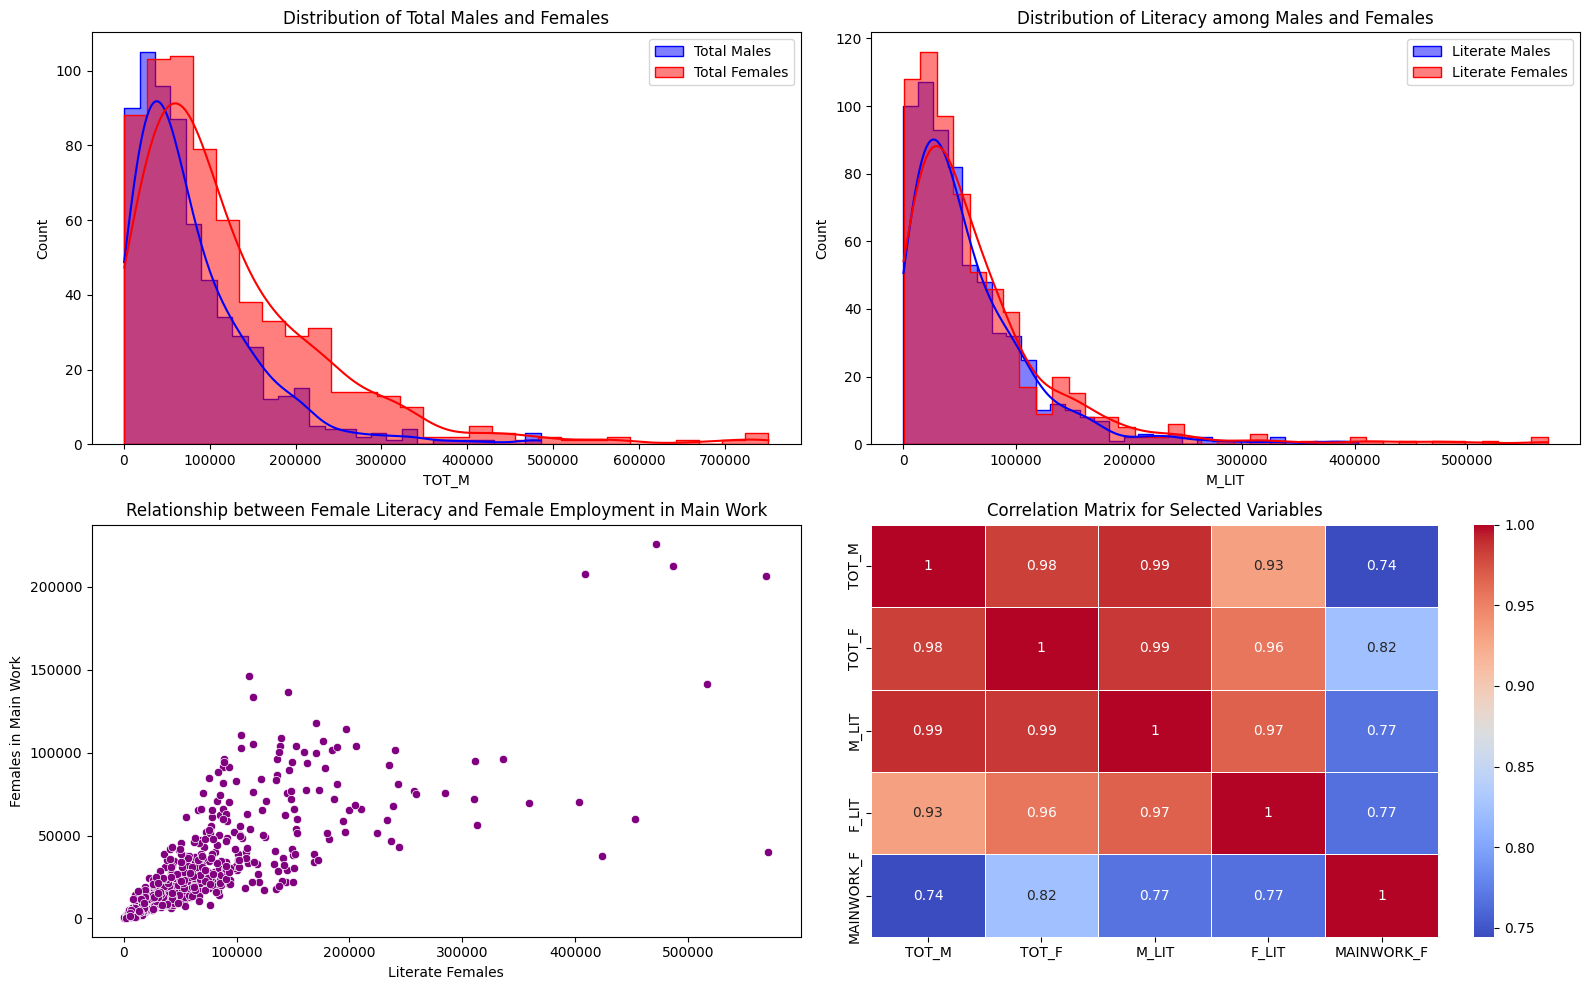

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Selected variables for EDA
selected_columns = ['TOT_M', 'TOT_F', 'M_LIT', 'F_LIT', 'MAINWORK_F']
selected_Data = df[selected_columns]

# Display basic information and the first few rows of the selected data
print(df.info())
print(df.describe())
print(df.head())

# Visualization
plt.figure(figsize=(16, 10))

# Histogram of Total Males and Total Females
plt.subplot(2, 2, 1)
sns.histplot(df['TOT_M'], color='blue', label='Total Males', kde=True, element='step')
sns.histplot(df['TOT_F'], color='red', label='Total Females', kde=True, element='step')
plt.title('Distribution of Total Males and Females')
plt.legend()

# Histogram of Literacy among Males and Females
plt.subplot(2, 2, 2)
sns.histplot(df['M_LIT'], color='blue', label='Literate Males', kde=True, element='step')
sns.histplot(df['F_LIT'], color='red', label='Literate Females', kde=True, element='step')
plt.title('Distribution of Literacy among Males and Females')
plt.legend()

# Scatter plot to show relationship between Female Literacy and Female Main Work
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='F_LIT', y='MAINWORK_F', color='purple')
plt.title('Relationship between Female Literacy and Female Employment in Main Work')
plt.xlabel('Literate Females')
plt.ylabel('Females in Main Work')

# Correlation Matrix for selected variables
plt.subplot(2, 2, 4)
# Calculating correlation only for selected data
correlation_matrix = selected_Data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Selected Variables')

plt.tight_layout()
plt.show()

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')


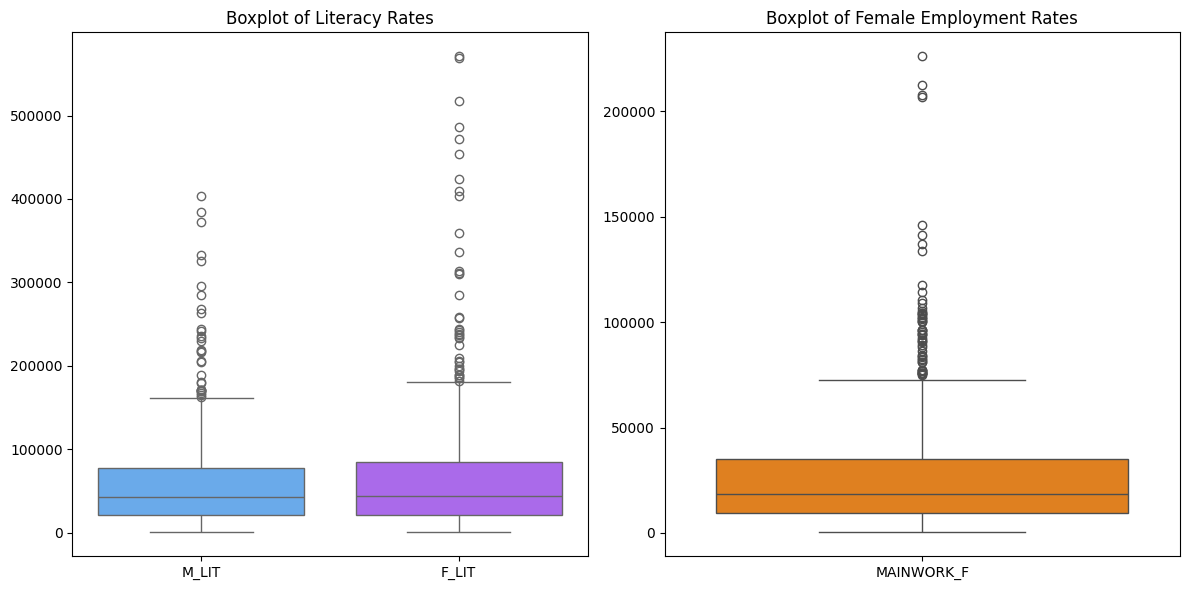

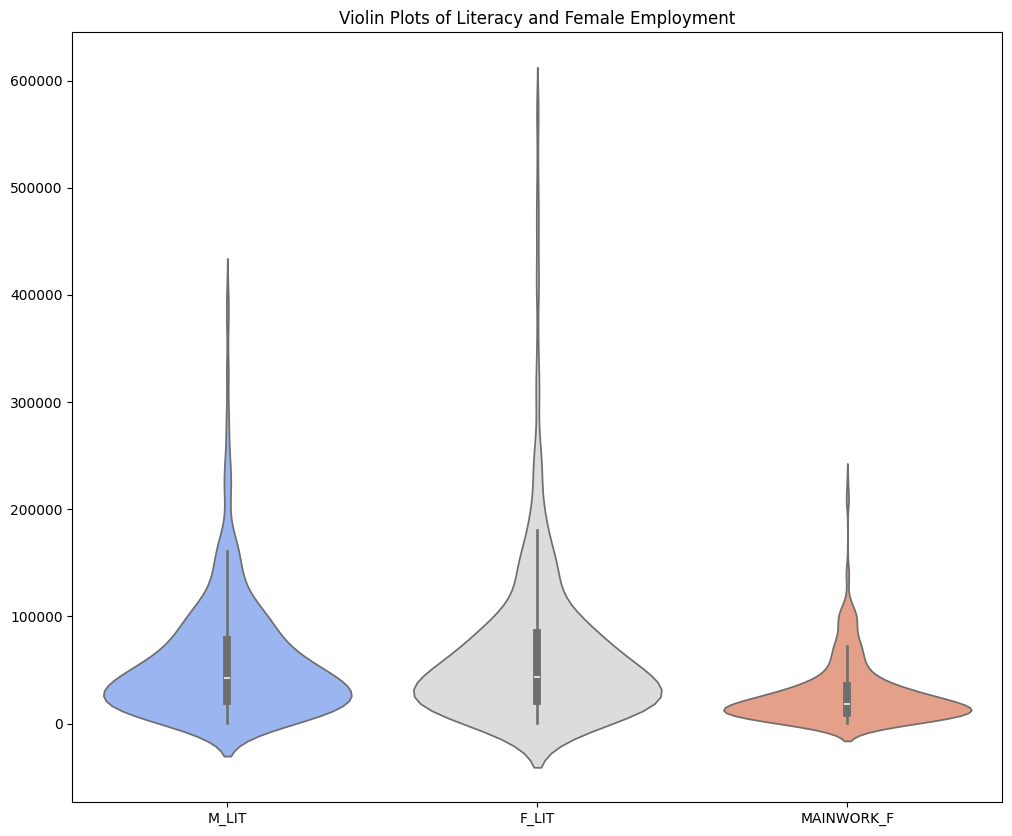

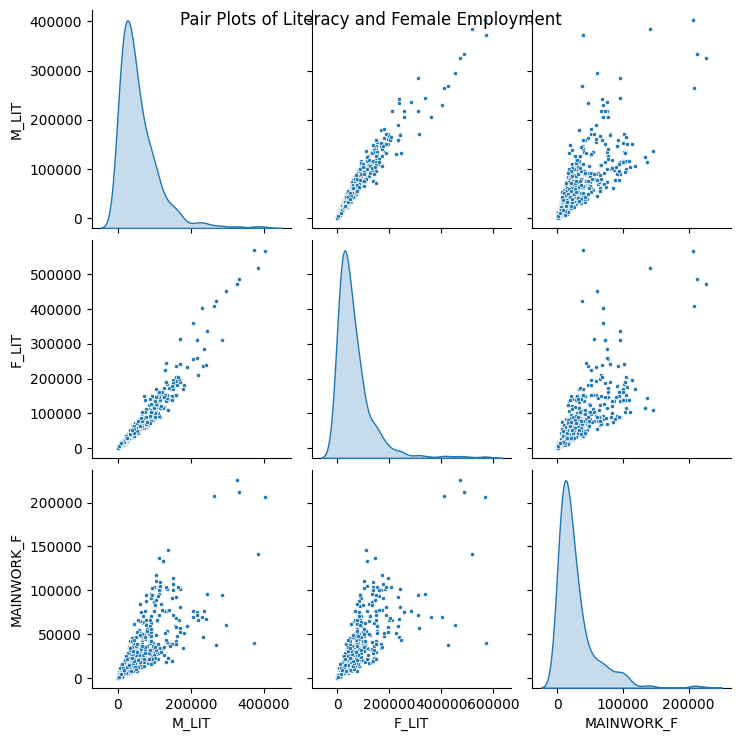

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)

selected_columns = ['TOT_M', 'TOT_F', 'M_LIT', 'F_LIT', 'MAINWORK_F']
selected_Data= df[selected_columns]

# Boxplots for Literacy and Employment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['M_LIT', 'F_LIT']], palette='cool')
plt.title('Boxplot of Literacy Rates')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[['MAINWORK_F']], palette='autumn')
plt.title('Boxplot of Female Employment Rates')

plt.tight_layout()
plt.show()

# Violin plots for Literacy and Female Employment
plt.figure(figsize=(12, 10))
sns.violinplot(data=df[['M_LIT', 'F_LIT', 'MAINWORK_F']], palette='coolwarm')
plt.title('Violin Plots of Literacy and Female Employment')

plt.show()

# Pair plots for the selected variables
sns.pairplot(df[['M_LIT', 'F_LIT', 'MAINWORK_F']], diag_kind='kde', markers='.')
plt.suptitle('Pair Plots of Literacy and Female Employment', verticalalignment='top')
plt.show()

# **(i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?**

Highest gender ratio state: ('Andhra Pradesh', 1895.093129626215)
Lowest gender ratio state: ('Lakshadweep', 1151.9925134523903)
Highest gender ratio district: (('Andhra Pradesh', 'Krishna'), 2283.24963845265)
Lowest gender ratio district: (('Lakshadweep', 'Lakshadweep'), 1151.9925134523903)


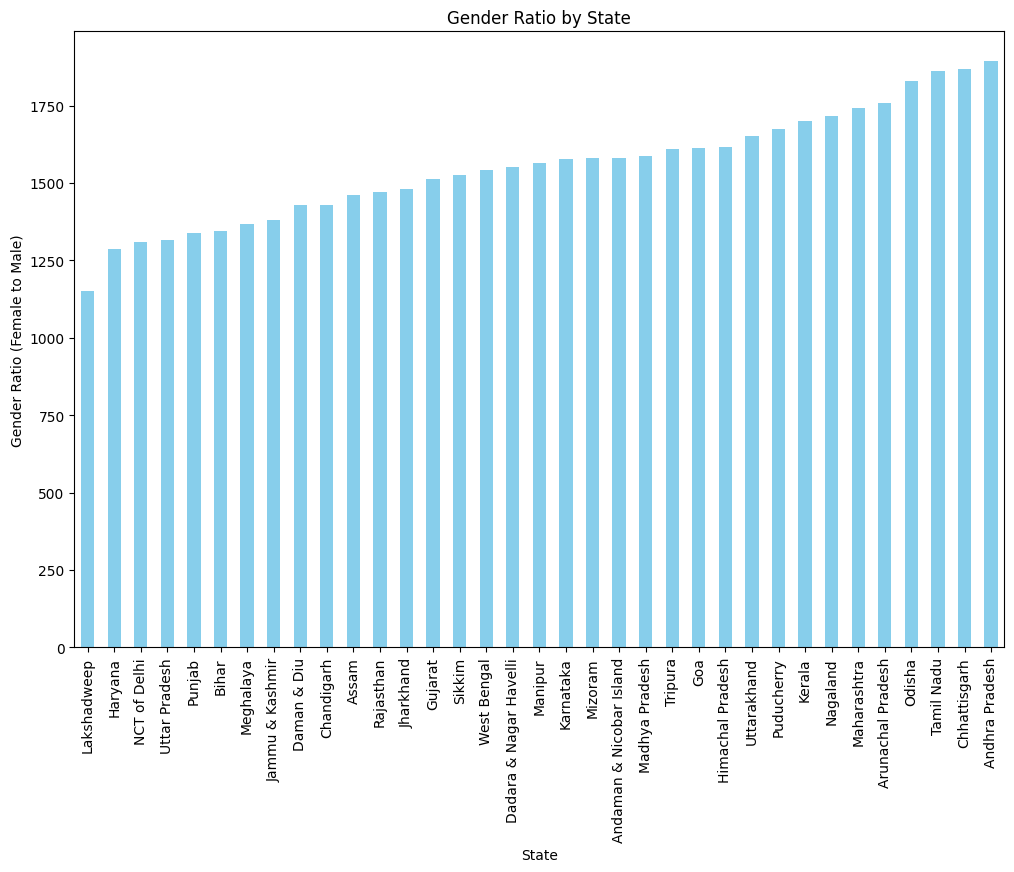

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the gender ratio (number of females per 1000 males)
df['Gender_Ratio'] = (df['TOT_F'] / df['TOT_M']) * 1000

# Find the state with the highest and lowest gender ratio
state_gender_ratio = df.groupby('State')['Gender_Ratio'].mean().sort_values()
highest_gender_ratio_state = state_gender_ratio.idxmax(), state_gender_ratio.max()
lowest_gender_ratio_state = state_gender_ratio.idxmin(), state_gender_ratio.min()

# Find the district with the highest and lowest gender ratio
district_gender_ratio = df.groupby(['State', 'Area Name'])['Gender_Ratio'].mean().sort_values()
highest_gender_ratio_district = district_gender_ratio.idxmax(), district_gender_ratio.max()
lowest_gender_ratio_district = district_gender_ratio.idxmin(), district_gender_ratio.min()
[ ]


print(f"Highest gender ratio state: {highest_gender_ratio_state}")
print(f"Lowest gender ratio state: {lowest_gender_ratio_state}")
print(f"Highest gender ratio district: {highest_gender_ratio_district}")
print(f"Lowest gender ratio district: {lowest_gender_ratio_district}")


# Visualization of Gender Ratios by State
plt.figure(figsize=(12, 8))
state_gender_ratio.sort_values().plot(kind='bar', color='skyblue')
plt.title('Gender Ratio by State')
plt.xlabel('State')
plt.ylabel('Gender Ratio (Female to Male)')
plt.show()

# **Problem 2 - Data Preprocessing**

 **Check for and treat (if needed) missing values - Check for and treat (if needed) data irregularities - Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers.**

In [9]:
import pandas as pd


# Check for missing values in each column
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

Missing values per column:
State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Gender_Ratio     0
Length: 62, dtype: int64


In [10]:
# Check for and treat data irregularities
# Since data irregularities can vary based on specific requirements, let's focus on general checks such as negative values for variables that should be non-negative.
non_negative_variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F']

# Check for negative values in non-negative variables
negative_values = df[non_negative_variables].lt(0).sum()
print("Negative Values:\n", negative_values)

Negative Values:
 No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0
MARGWORK_0_3_F    0
MARG_CL_0_3_M     0
MARG_CL_0_3_F     0
MA

# **There are no negative values.**

**Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers.**

**Before Scaling**

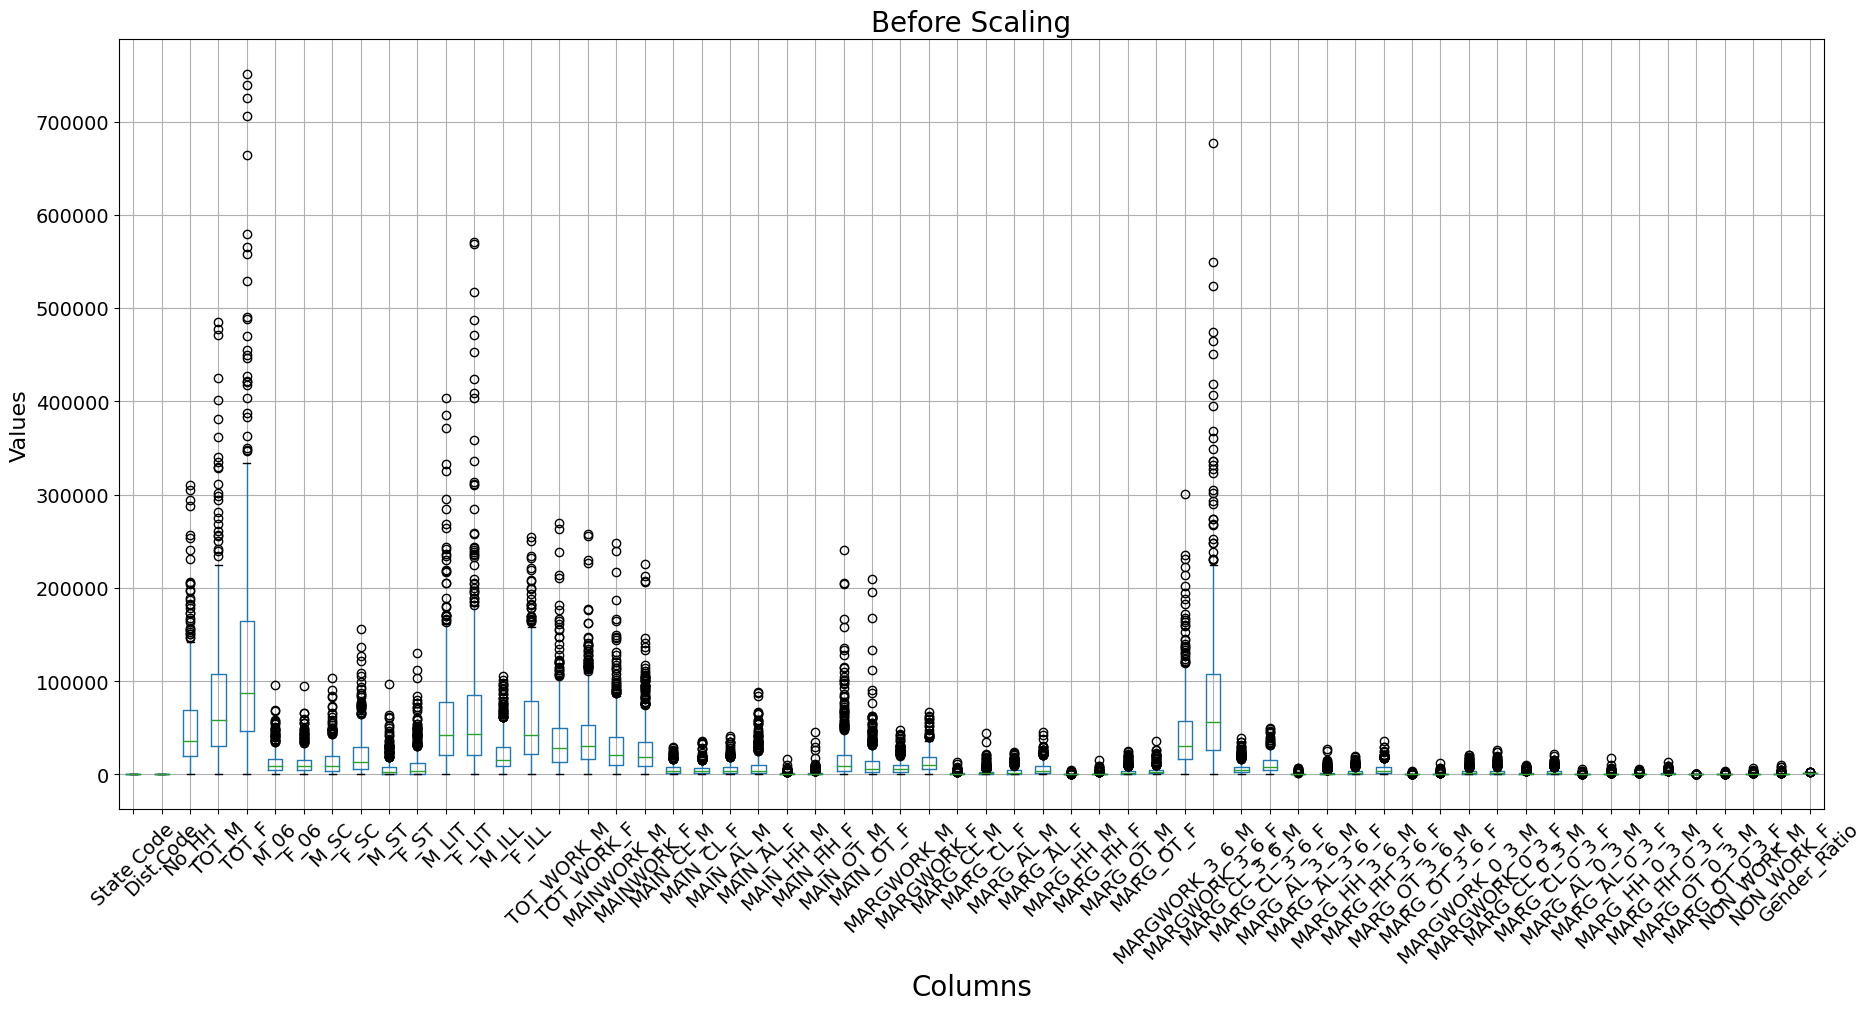

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only the numerical columns for visualization
numerical_columns = df.select_dtypes(include=['float', 'int64']).columns.tolist()
numerical_data = df[numerical_columns]

plt.figure(figsize=(22, 10))
plt.rcParams.update({'font.size': 14})

# Visualize the data before scaling
numerical_data.boxplot(rot=45)
plt.title('Before Scaling', fontsize=20)
plt.xlabel('Columns', fontsize=20)
plt.ylabel('Values', fontsize=16)

plt.show()

**After Scaling**

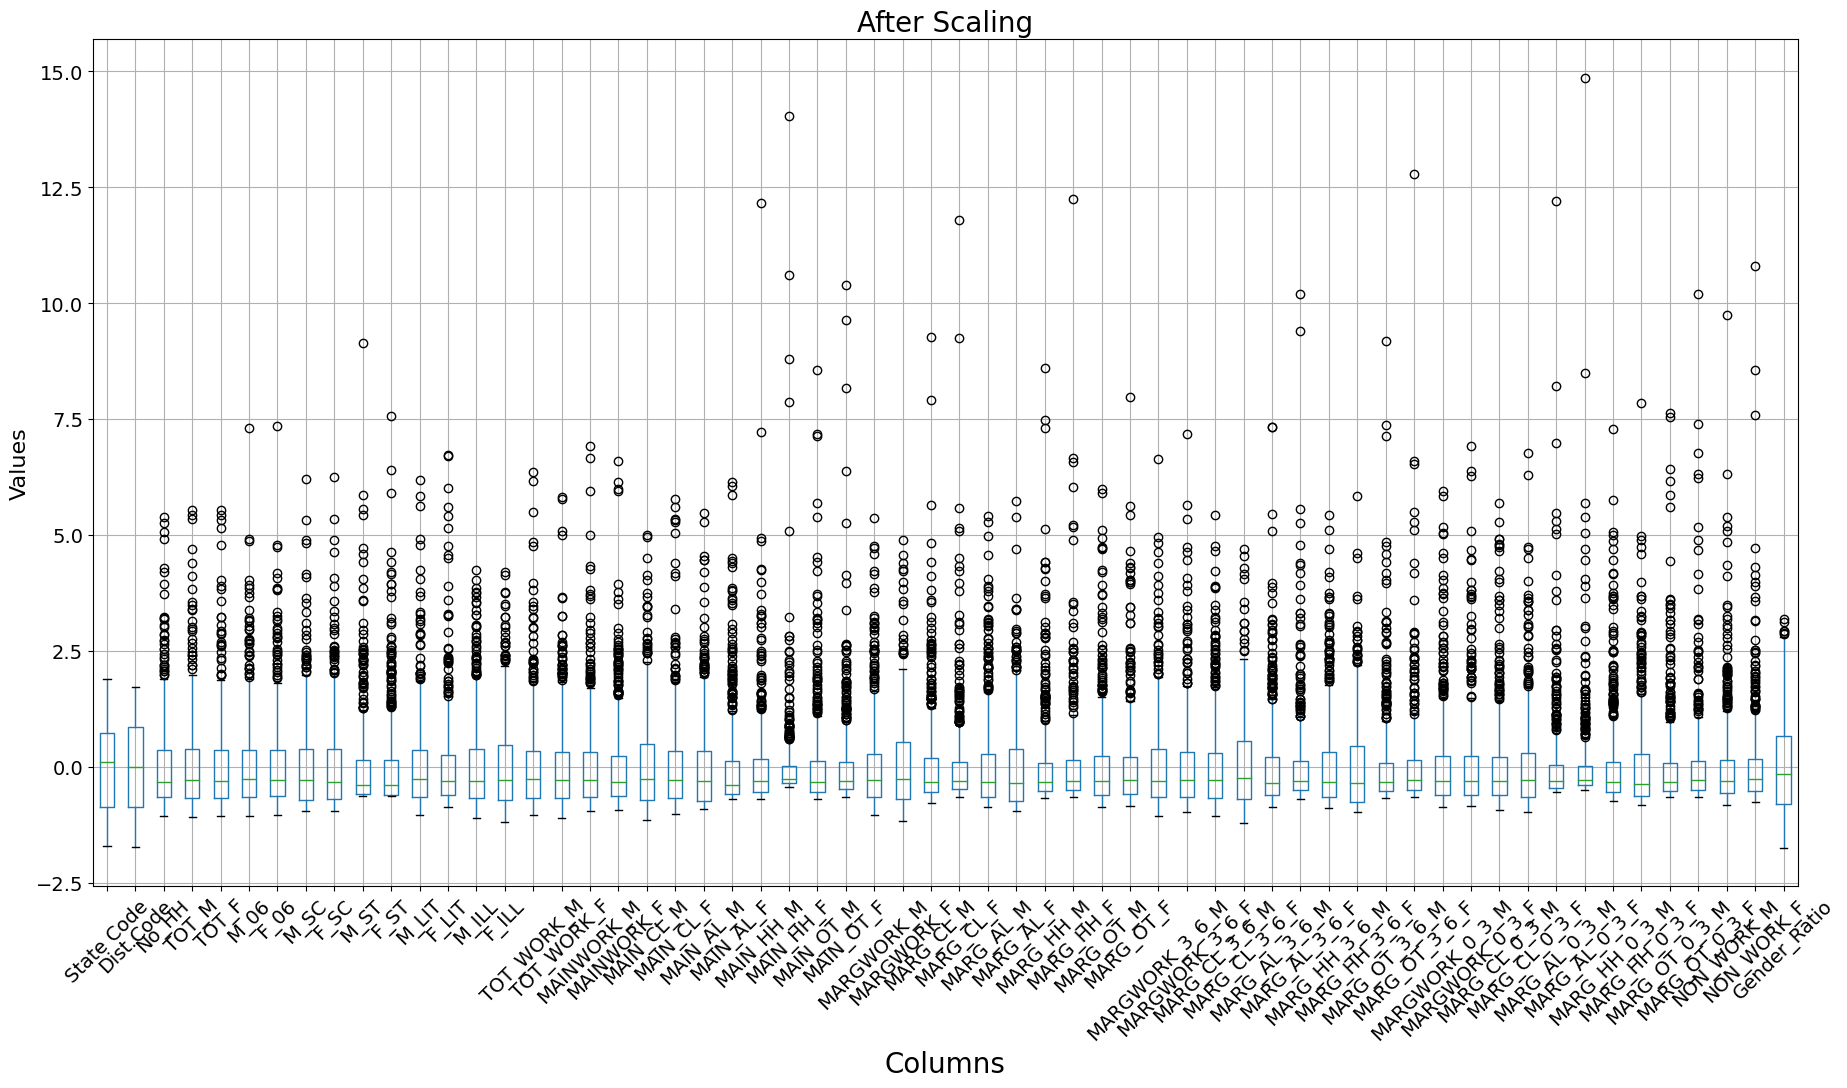

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df is your DataFrame
# Select only the numerical columns for scaling
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_data = df[numerical_columns]

# Check and handle missing values before scaling
if numerical_data.isnull().values.any():
    numerical_data = numerical_data.fillna(numerical_data.mean())

# Scale the data using z-score method
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply the scaler to the numeric columns
df[numerical_columns] = scaled_data

plt.figure(figsize=(22, 11))

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Visualize the data after scaling
scaled_df.boxplot(rot=45)
plt.title('After Scaling', fontsize=20)
plt.xlabel('Columns', fontsize=20)
plt.ylabel('Values', fontsize=16)

plt.show()


# **comment on the impact on outliers After Scaling:**



**1. Scale of Values**

**Before Scaling**: The values across various columns vary widely, ranging from nearly zero to over 700,000. This wide range indicates that the dataset contains features with vastly different scales, which can be problematic for many machine learning algorithms that are sensitive to the scale of input features.

**After Scaling**: In the scaled data, all values are normalized to a more uniform scale, roughly between -2.5 and 15. This uniformity is crucial for many algorithms, particularly those that use distance calculations, as it ensures that all features contribute equally to the result.

**2. Presence and Visibility of Outliers**

**Before Scaling**: Outliers are present in several columns, and their impact is pronounced due to the large scale of values. These outliers can significantly affect the mean and standard deviation of the respective columns, potentially leading to misleading analysis.

**After Scaling**: Outliers remain visible but are less extreme compared to the unscaled data. The scaling process has reduced their relative impact by bringing them closer to the other data points. However, the persistence of these outliers suggests that the scaling method used might not be robust against outliers (such as simple min-max scaling or standard normalization).

**3. Distribution and Spread of Data**

**Before Scaling**: The spread of the data in many columns is large, and the differences between the minimum and maximum values are substantial. This variability can overshadow the contributions of features with smaller ranges when using certain algorithms.

**After Scaling**: The spread of data in each column is more controlled and uniform. The interquartile ranges (the boxes in the boxplots) are more consistent across features, indicating a more uniform distribution of data after scaling. This consistency helps in analytical models to treat all features with equal importance.

**4. Impact on Machine Learning and Statistical Analysis**

**Before Scaling**: The wide disparity in ranges could lead to biased or inefficient learning in machine learning models, where algorithms might unduly emphasize features with broader ranges.

**After Scaling**: The normalization helps in mitigating this issue, making the dataset more suitable for a wide range of statistical analyses and machine learning models, particularly those involving distance measures like k-nearest neighbors or clustering algorithms.

In [14]:
numerical_data

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,Gender_Ratio
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,749,180,237,680,252,32,46,258,214,1273.986660
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,715,123,229,186,148,76,178,140,160,1179.576206
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,188,44,89,3,34,0,4,67,61,1674.915979
3,1,4,1320,2784,4206,563,677,0,0,2666,...,247,61,128,13,50,4,10,116,59,1510.775862
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,1928,465,1043,205,302,24,105,180,478,1456.024477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,3333,8154,11781,1146,1203,21,30,0,...,47,0,0,0,0,0,0,32,47,1444.812362
636,34,637,10612,12346,21691,1544,1533,2234,4155,0,...,337,3,14,38,130,4,23,110,170,1756.925320
637,35,638,1275,1549,2630,227,225,0,0,1012,...,134,9,4,2,6,17,47,76,77,1697.869593
638,35,639,3762,5200,8012,723,664,0,0,28,...,172,24,44,11,21,1,4,100,103,1540.769231


In [15]:
scaled_df

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,Gender_Ratio
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614,-1.221372
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988,-1.633860
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839,0.530326
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038,-0.186818
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344,-0.426032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.792730,1.707696,-0.995677,-0.978990,-0.974268,-0.971387,-0.948916,-0.957326,-0.955667,-0.625124,...,-0.972530,-0.553861,-0.499744,-0.735831,-0.816489,-0.662068,-0.648604,-0.783468,-0.723232,-0.475018
636,1.792730,1.713109,-0.844340,-0.921822,-0.886965,-0.936754,-0.919757,-0.803806,-0.765670,-0.625124,...,-0.868461,-0.547238,-0.487208,-0.685961,-0.734425,-0.624966,-0.574290,-0.655625,-0.587993,0.888633
637,1.898897,1.718521,-1.038465,-1.069066,-1.054885,-1.051356,-1.035331,-0.958783,-0.957049,-0.522953,...,-0.941309,-0.533992,-0.496162,-0.733206,-0.812701,-0.504388,-0.496746,-0.711352,-0.690247,0.630613
638,1.898897,1.723934,-0.986758,-1.019276,-1.007472,-1.008195,-0.996541,-0.958783,-0.957049,-0.622297,...,-0.927673,-0.500878,-0.460344,-0.721395,-0.803232,-0.652792,-0.635680,-0.672015,-0.661660,-0.055774


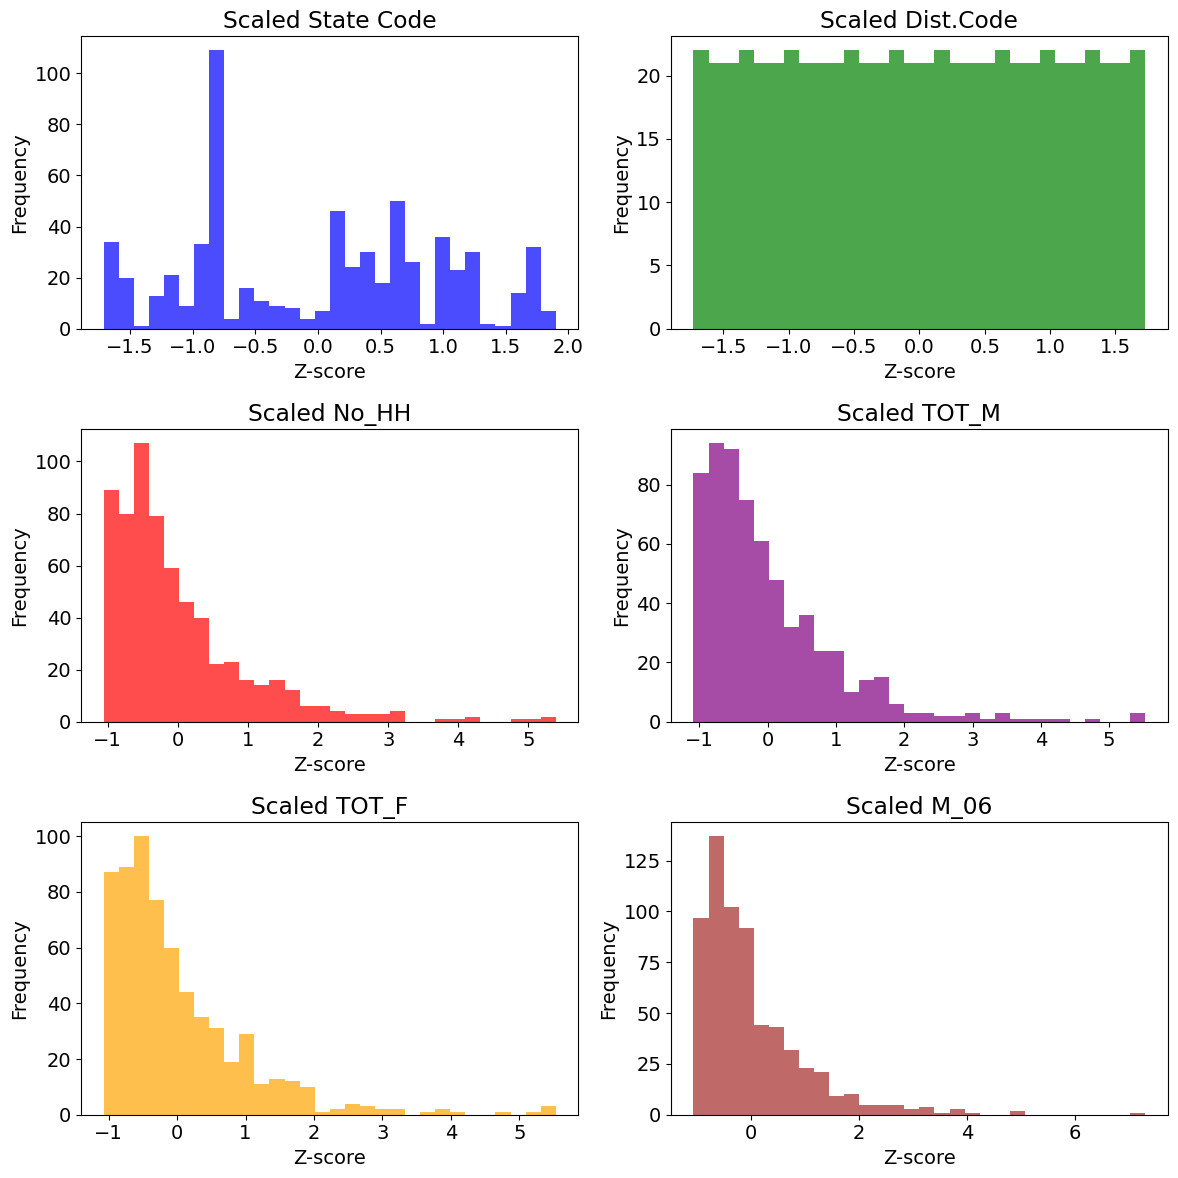

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Instantiate the StandardScaler
scaler = StandardScaler()

# Define a list of colors for the histograms
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Plotting histograms for scaled data
fig, ax = plt.subplots(3, 2, figsize=(12, 12))  # Adjust subplot layout as needed
ax = ax.ravel()

for i, col in enumerate(numerical_columns[:6]):  # Just plot the first 6 numeric columns for brevity
    ax[i].hist(scaled_df[col], bins=30, color=colors[i], alpha=0.7)
    ax[i].set_title(f'Scaled {col}')
    ax[i].set_xlabel('Z-score')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Problem 2 - PCA**
**- Create the covariance matrix - Get eigen values and eigen vectors - Identify the optimum number of PCs - Show Scree plot - Compare PCs with Actual Columns and identify which is explaining most variance - Write inferences about all the PCs in terms of actual variables - Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.**


# **Step 1 :Create the covariance matrix**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Exclude non-numeric columns
df_numeric = scaled_df.select_dtypes(include=[np.number])  # Only numeric data

# Verify that all columns are now numeric
print(df_numeric.dtypes)

State Code        float64
Dist.Code         float64
No_HH             float64
TOT_M             float64
TOT_F             float64
M_06              float64
F_06              float64
M_SC              float64
F_SC              float64
M_ST              float64
F_ST              float64
M_LIT             float64
F_LIT             float64
M_ILL             float64
F_ILL             float64
TOT_WORK_M        float64
TOT_WORK_F        float64
MAINWORK_M        float64
MAINWORK_F        float64
MAIN_CL_M         float64
MAIN_CL_F         float64
MAIN_AL_M         float64
MAIN_AL_F         float64
MAIN_HH_M         float64
MAIN_HH_F         float64
MAIN_OT_M         float64
MAIN_OT_F         float64
MARGWORK_M        float64
MARGWORK_F        float64
MARG_CL_M         float64
MARG_CL_F         float64
MARG_AL_M         float64
MARG_AL_F         float64
MARG_HH_M         float64
MARG_HH_F         float64
MARG_OT_M         float64
MARG_OT_F         float64
MARGWORK_3_6_M    float64
MARGWORK_3_6

Covariance Matrix:
[[ 1.00156495  0.99457535  0.38502614 ...  0.12572474  0.23208471
   0.56705561]
 [ 0.99457535  1.00156495  0.37756089 ...  0.11226784  0.21313518
   0.56677222]
 [ 0.38502614  0.37756089  1.00156495 ...  0.76357722  0.73684378
   0.19172282]
 ...
 [ 0.12572474  0.11226784  0.76357722 ...  1.00156495  0.88228018
  -0.09944555]
 [ 0.23208471  0.21313518  0.73684378 ...  0.88228018  1.00156495
   0.07963851]
 [ 0.56705561  0.56677222  0.19172282 ... -0.09944555  0.07963851
   1.00156495]]


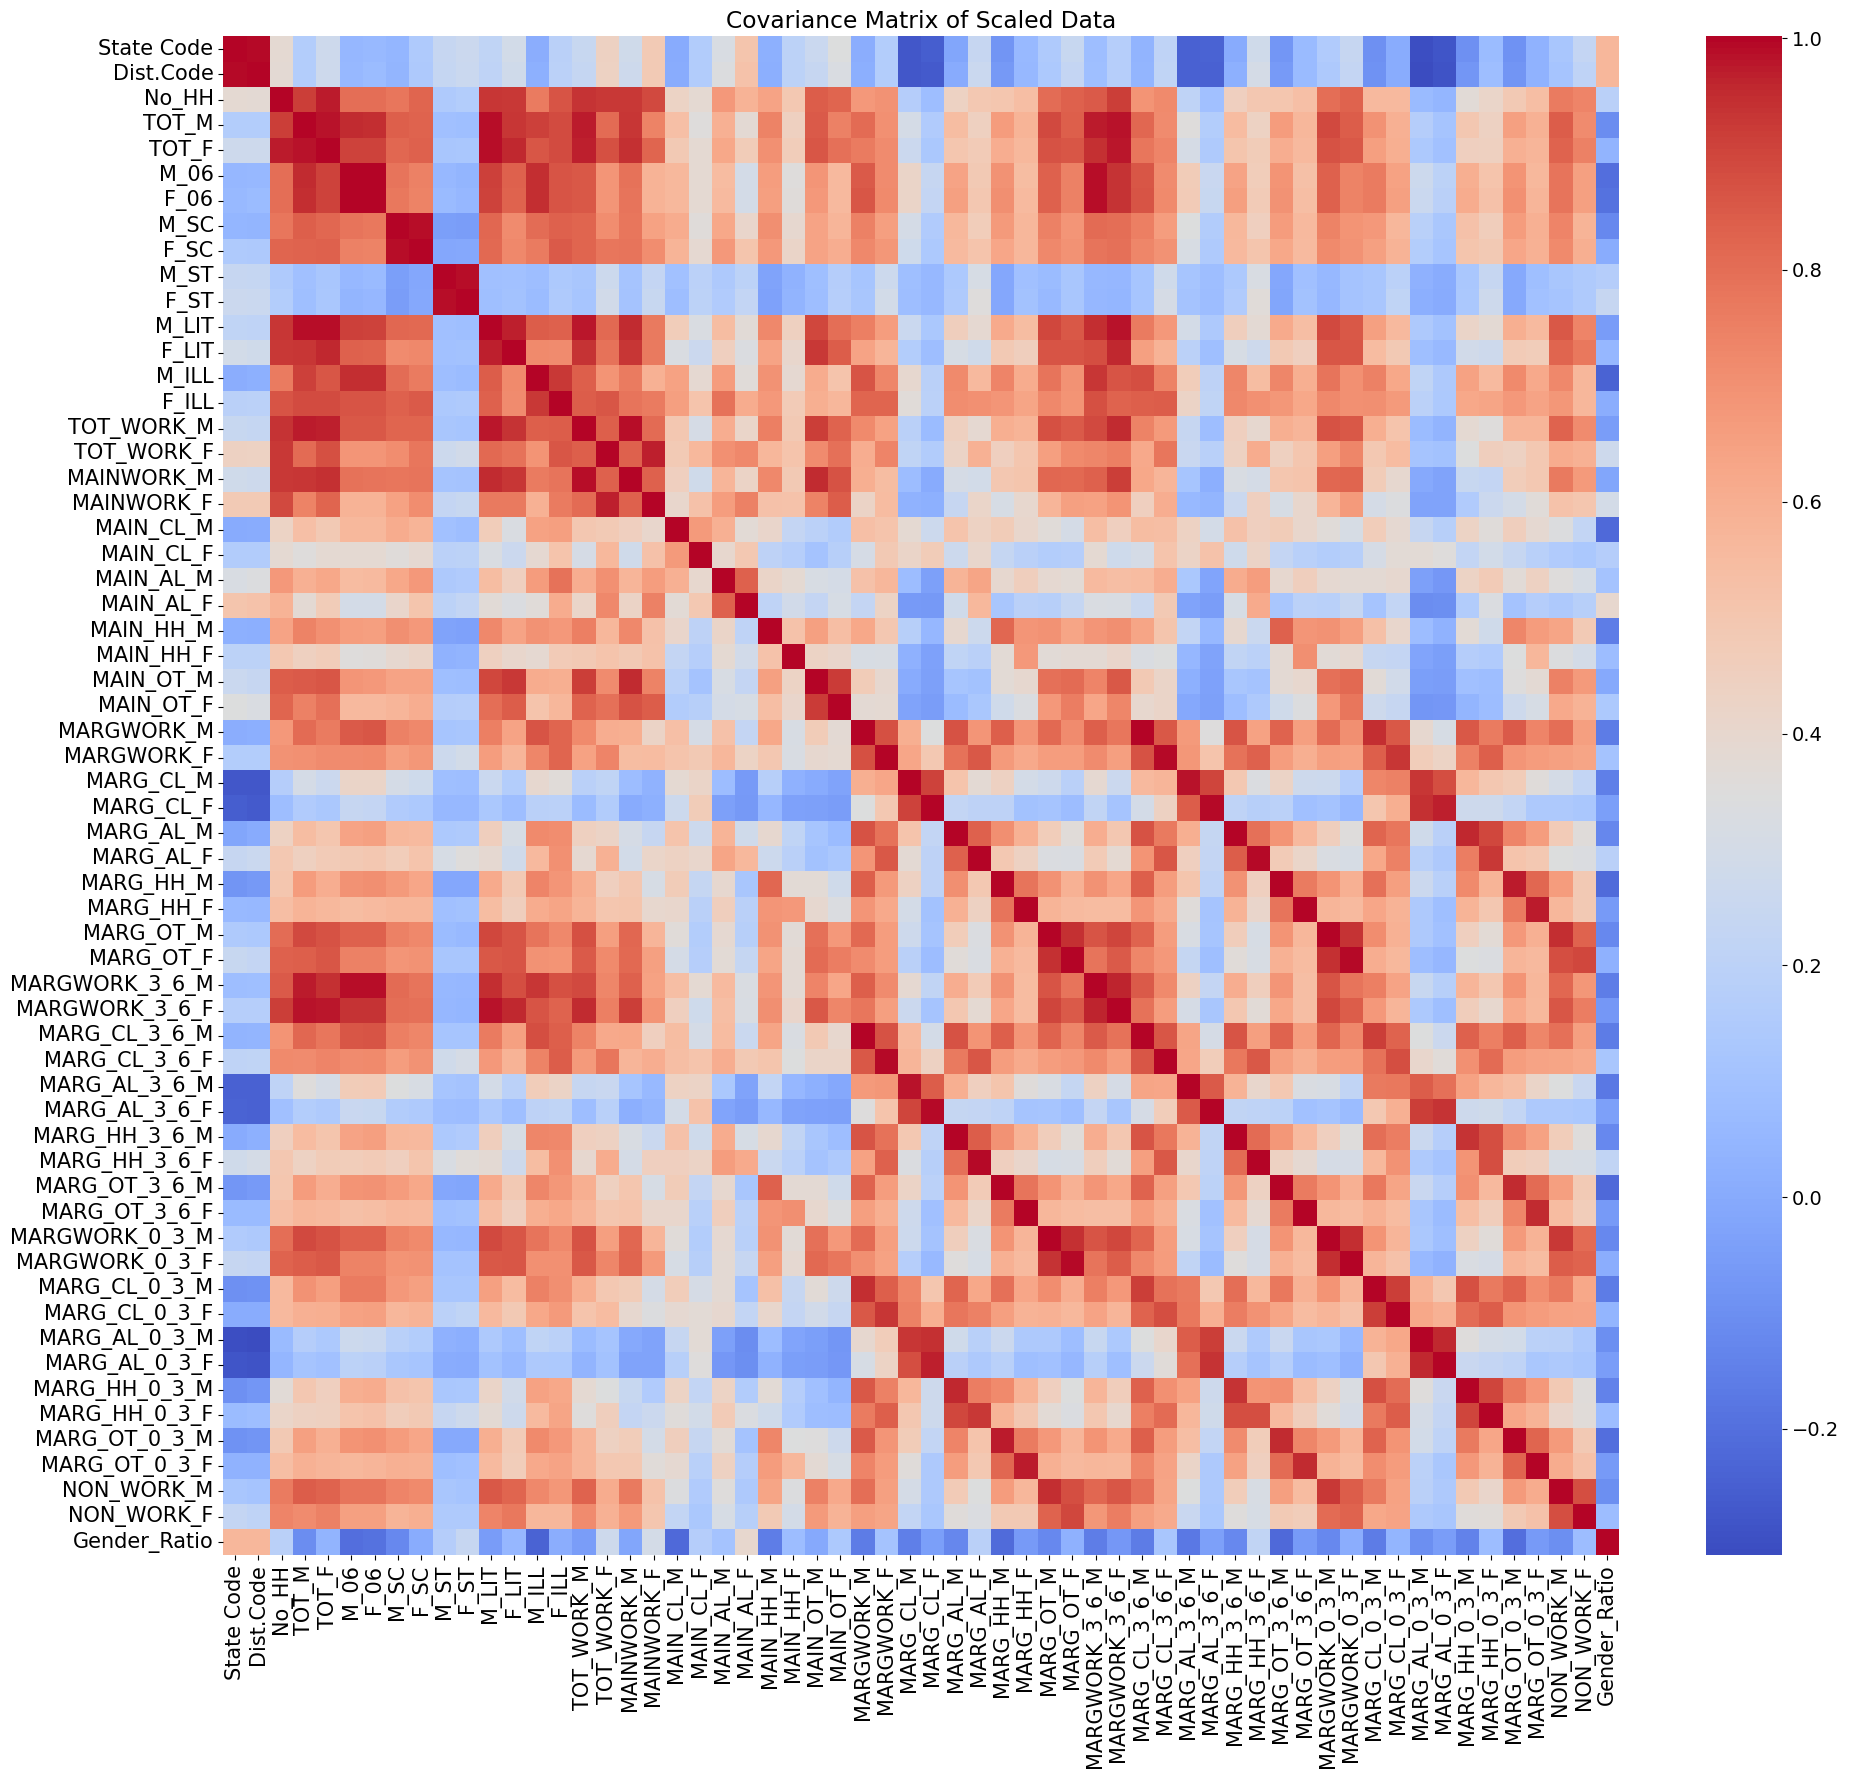

In [18]:
# Compute covariance matrix from the filtered numeric DataFrame
covariance_matrix = np.cov(df_numeric.T)

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

# Visualize the covariance matrix
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed

# Create a heatmap and rotate the tick labels for better visibility
ax = sns.heatmap(covariance_matrix, cmap='coolwarm', annot=False,
                 xticklabels=numerical_columns, yticklabels=numerical_columns)

# Rotate x and y tick labels for better readability
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.title('Covariance Matrix of Scaled Data')
plt.tight_layout()
plt.show()


# **Step 2 : Get eigen values and eigen vectors**

In [22]:
# Step 2: Get Eigenvalues and Eigenvectors
import numpy as np

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Print Eigenvalues
print("Eigenvalues:")
print(eigenvalues)

# Print Eigenvectors
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 3.18688885e+01+0.00000000e+00j  8.22917104e+00+0.00000000e+00j
  4.80722451e+00+0.00000000e+00j  3.92901693e+00+0.00000000e+00j
  2.31829290e+00+0.00000000e+00j  2.00389746e+00+0.00000000e+00j
  1.52046849e+00+0.00000000e+00j  8.89337793e-01+0.00000000e+00j
  7.30596615e-01+0.00000000e+00j  6.28300921e-01+0.00000000e+00j
  4.95151133e-01+0.00000000e+00j  4.53516495e-01+0.00000000e+00j
  4.17512850e-01+0.00000000e+00j  2.80284774e-01+0.00000000e+00j
  2.96135603e-01+0.00000000e+00j  2.57748460e-01+0.00000000e+00j
  1.82482899e-01+0.00000000e+00j  1.27431879e-01+0.00000000e+00j
  1.11534941e-01+0.00000000e+00j  1.02255494e-01+0.00000000e+00j
  9.48312111e-02+0.00000000e+00j  7.77624132e-02+0.00000000e+00j
  5.55762931e-02+0.00000000e+00j  4.19336464e-02+0.00000000e+00j
  3.27995670e-02+0.00000000e+00j  2.96700392e-02+0.00000000e+00j
  2.64047652e-02+0.00000000e+00j  2.27207823e-02+0.00000000e+00j
  1.43594540e-02+0.00000000e+00j  1.10850662e-02+0.00000000e+00j
  9.18636917

# **Step 3 :Identify the optimum number of PCs**

In [23]:
# Step 3: Identify the Optimum Number of PCs
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)
optimal_num_pcs = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print("Optimal Number of PCs:", optimal_num_pcs)


Cumulative Explained Variance Ratio:
[0.53031822+0.00000000e+00j 0.66725677+0.00000000e+00j
 0.74725199+0.00000000e+00j 0.81263329+0.00000000e+00j
 0.85121113+0.00000000e+00j 0.88455724+0.00000000e+00j
 0.90985879+0.00000000e+00j 0.92465792+0.00000000e+00j
 0.93681551+0.00000000e+00j 0.94727083+0.00000000e+00j
 0.95551045+0.00000000e+00j 0.96305725+0.00000000e+00j
 0.97000492+0.00000000e+00j 0.97466904+0.00000000e+00j
 0.97959692+0.00000000e+00j 0.98388601+0.00000000e+00j
 0.98692264+0.00000000e+00j 0.98904319+0.00000000e+00j
 0.9908992 +0.00000000e+00j 0.9926008 +0.00000000e+00j
 0.99417885+0.00000000e+00j 0.99547286+0.00000000e+00j
 0.99639769+0.00000000e+00j 0.99709549+0.00000000e+00j
 0.99764129+0.00000000e+00j 0.99813502+0.00000000e+00j
 0.99857441+0.00000000e+00j 0.9989525 +0.00000000e+00j
 0.99919145+0.00000000e+00j 0.99937591+0.00000000e+00j
 0.99952878+0.00000000e+00j 0.99965691+0.00000000e+00j
 0.99977152+0.00000000e+00j 0.99985463+0.00000000e+00j
 0.99992925+0.00000000e+00j 

# **Step 4 : Show Scree plot**

In [24]:
# Perform PCA
pca = PCA(n_components=len(numerical_columns))
principal_components = pca.fit_transform(df_numeric)

# Explained variance
explained_variance = pca.explained_variance_ratio_

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


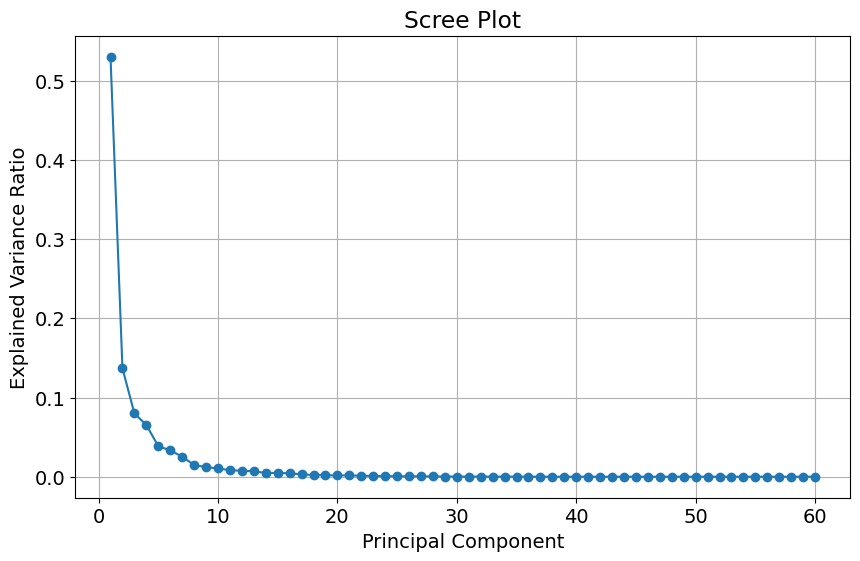

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


# **Step 5 : Compare PCs with Actual Columns and identify which is explaining most variance**

In [26]:
# Step 5: Compare PCs with Actual Columns
pc_variances = {}
for i in range(len(explained_variance_ratio)):
    pc_variances[f'PC{i+1}'] = explained_variance_ratio[i]

sorted_pc_variances = sorted(pc_variances.items(), key=lambda x: x[1], reverse=True)
print("Principal Components and their Explained Variances:")
for pc, variance in sorted_pc_variances:
    print(f"{pc}: {variance:.4f}")

Principal Components and their Explained Variances:
PC1: 0.5303+0.0000j
PC2: 0.1369+0.0000j
PC3: 0.0800+0.0000j
PC4: 0.0654+0.0000j
PC5: 0.0386+0.0000j
PC6: 0.0333+0.0000j
PC7: 0.0253+0.0000j
PC8: 0.0148+0.0000j
PC9: 0.0122+0.0000j
PC10: 0.0105+0.0000j
PC11: 0.0082+0.0000j
PC12: 0.0075+0.0000j
PC13: 0.0069+0.0000j
PC15: 0.0049+0.0000j
PC14: 0.0047+0.0000j
PC16: 0.0043+0.0000j
PC17: 0.0030+0.0000j
PC18: 0.0021+0.0000j
PC19: 0.0019+0.0000j
PC20: 0.0017+0.0000j
PC21: 0.0016+0.0000j
PC22: 0.0013+0.0000j
PC23: 0.0009+0.0000j
PC24: 0.0007+0.0000j
PC25: 0.0005+0.0000j
PC26: 0.0005+0.0000j
PC27: 0.0004+0.0000j
PC28: 0.0004+0.0000j
PC29: 0.0002+0.0000j
PC30: 0.0002+0.0000j
PC31: 0.0002+0.0000j
PC32: 0.0001+0.0000j
PC33: 0.0001+0.0000j
PC34: 0.0001+0.0000j
PC35: 0.0001+0.0000j
PC36: 0.0000+0.0000j
PC37: 0.0000+0.0000j
PC38: 0.0000+0.0000j
PC40: 0.0000+0.0000j
PC42: 0.0000+0.0000j
PC44: 0.0000+0.0000j
PC47: 0.0000+0.0000j
PC48: 0.0000+0.0000j
PC49: 0.0000+0.0000j
PC50: 0.0000+0.0000j
PC51: 0.0000

In [27]:
# Calculate optimal number of PCs
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_num_pcs = np.where(cumulative_variance >= 0.90)[0][0] + 1
print(f"Optimal Number of Principal Components: {optimal_num_pcs}")

Optimal Number of Principal Components: 7


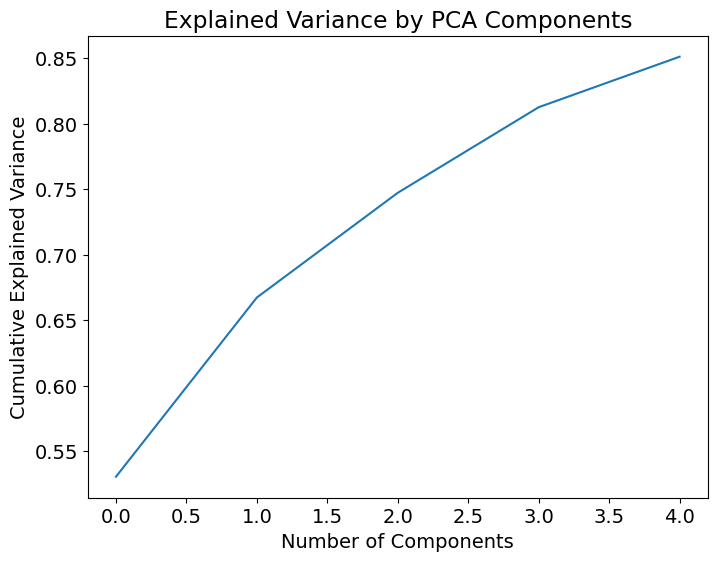

In [28]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
pca.fit(df_numeric)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

**Principal Component 1 (PC1):**


**Explained Variance: 53.03%**

**Most Influential Variables**: The variables contributing most significantly to this component are likely related to general population metrics such as total population counts or economic factors, given the high variance explained.
Interpretation: PC1 typically captures the broadest trends in the dataset, representing the most significant underlying pattern such as overall size or economic activity.

**Principal Component 2 (PC2):**

**Explained Variance: 13.69%**

**Most Influential Variables**: This component might be significantly influenced by variables such as age distribution or employment sectors, reflecting secondary but still significant demographic or economic dimensions.

**Interpretation**: PC2 might encapsulate contrasts within the dataset not captured by the first principal component, such as differences between urban and rural areas, or employed and unemployed populations.

**Principal Component 3 (PC3) to Principal Component 7 (PC7):**

**Cumulative Explained Variance (through PC7)**: Approximately 90%
Most Influential Variables: These components may be influenced by more specific variables such as educational levels, health metrics, specific employment sectors, or migration patterns.

**Interpretation:** These components often reveal more nuanced insights into the dataset, such as specific socio-economic drivers or regional characteristics.

**Detailed Interpretation:**

PC3, capturing around 8% of the variance, might indicate variations in education or health services accessibility.

PC4 and PC5, explaining smaller proportions (around 6.54% and 3.86% respectively), could reflect more localized or less pronounced patterns, such as variations in certain age groups or specific economic activities.
PC6 and PC7, each explaining just over 3%, might highlight niche aspects like specific industries' impact or minor social trends.

**Conclusion:**

The first few principal components usually capture the most significant patterns and trends in the data, with PC1 often being a 'size' factor (reflecting the overall magnitude of data points) and subsequent components illustrating orthogonal (independent) patterns of variability.


Through this PCA, you can discern that a substantial part of the dataset's structure is explained by just a few key dimensions (e.g., demographics, economics), with diminishing returns on explanatory power as more components are added. This analysis not only aids in understanding the latent structure of the data but also in reducing dimensionality by focusing on the components that capture the most meaningful variance.

Principal Component Analysis Insight:

Principal Component 1 (PC1)

Explained Variance: 53.03%

Characteristics: PC1 typically captures the largest variance along the dimension that accounts for the broadest spread in the dataset. Given the high percentage of variance explained, PC1 is likely influenced by overall size or scale factors such as total population, total workforce, or total economic output, assuming these variables are part of the dataset.

Dominant Variables: If PC1 shows high loadings for variables like "Total Population" (TOT_M, TOT_F), this suggests that the principal variance across the dataset is driven by population size.

Principal Component 2 (PC2)

Explained Variance: 13.69%

Characteristics: PC2 might capture contrasts not accounted for by PC1, potentially representing urban versus rural dynamics, age distributions, or income disparities.

Dominant Variables: High loadings on "Urban Population", "Median Income", or similar variables would indicate key differentiators along PC2.

Principal Component 3 (PC3)

Explained Variance: 8.00%

Characteristics: This component might capture underlying patterns related to more specific demographic or economic conditions such as educational attainment or health metrics.

Dominant Variables: Variables like "Education Level" or "Access to Healthcare" might load significantly on PC3.

Analysis Through PCA Loadings:

The PCA loadings tell us how each variable influences a particular principal component. A high absolute value in the loadings matrix for a specific variable on PC1 suggests that this variable is a strong driver of the variance that PC1 represents. The same applies for PC2, PC3, and subsequent components.


Comparing PCs with Original Columns:

To concretely determine which original variables are most influential for each

 principal component:

PC1 might show strong positive loadings for overall economic activity indicators and total demographic metrics.

PC2 might show strong loadings for variables that differentiate secondary aspects like geographical or socio-economic differences (e.g., rural vs. urban population).

PC3 and beyond could reveal more nuanced influences like specific age groups, employment types, or educational backgrounds influencing these components.

Conclusion:

By mapping the loadings back to the original variables, you gain insights into what each principal component represents in the context of your data's underlying structure. For instance, if PC1 is heavily influenced by total population metrics, any significant patterns or clustering seen in a PCA-based analysis could be driven primarily by population size differences across data points.

**Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.**

In [29]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(eigenvalues.real) / np.sum(eigenvalues.real)

# Identify the number of principal components needed to explain at least 90% variance
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Select the first 'num_components_90' principal components
first_pc = eigenvectors[:, :num_components_90]

# Write linear equation for the selected principal components
linear_equations = []
for i in range(num_components_90):
    pc = first_pc[:, i]
    equation_terms = [f"{pc[j].real:.4f} * {df.columns[j]}" for j in range(len(pc))]
    linear_equation = " + ".join(equation_terms)
    linear_equations.append(linear_equation)

# Print linear equations for the selected principal components
print(f"Linear Equations for First {num_components_90} PCs:")
for i, equation in enumerate(linear_equations):
    print(f"PC{i+1}: {equation}")

Linear Equations for First 7 PCs:
PC1: -0.0299 * State Code + -0.0299 * Dist.Code + -0.1564 * State + -0.1670 * Area Name + -0.1657 * No_HH + -0.1619 * TOT_M + -0.1623 * TOT_F + -0.1511 * M_06 + -0.1515 * F_06 + -0.0276 * M_SC + -0.0286 * F_SC + -0.1620 * M_ST + -0.1471 * F_ST + -0.1614 * M_LIT + -0.1652 * F_LIT + -0.1600 * M_ILL + -0.1464 * F_ILL + -0.1464 * TOT_WORK_M + -0.1246 * TOT_WORK_F + -0.1029 * MAINWORK_M + -0.0746 * MAINWORK_F + -0.1137 * MAIN_CL_M + -0.0747 * MAIN_CL_F + -0.1313 * MAIN_AL_M + -0.0836 * MAIN_AL_F + -0.1238 * MAIN_HH_M + -0.1115 * MAIN_HH_F + -0.1642 * MAIN_OT_M + -0.1552 * MAIN_OT_F + -0.0815 * MARGWORK_M + -0.0484 * MARGWORK_F + -0.1282 * MARG_CL_M + -0.1144 * MARG_CL_F + -0.1403 * MARG_AL_M + -0.1274 * MARG_AL_F + -0.1552 * MARG_HH_M + -0.1474 * MARG_HH_F + -0.1647 * MARG_OT_M + -0.1612 * MARG_OT_F + -0.1651 * MARGWORK_3_6_M + -0.1556 * MARGWORK_3_6_F + -0.0922 * MARG_CL_3_6_M + -0.0508 * MARG_CL_3_6_F + -0.1282 * MARG_AL_3_6_M + -0.1108 * MARG_AL_3_6_F + 

In [30]:
# Linear equation for the first PC
first_pc = pca.components_[0]
equation = " + ".join(f"{coef:.3f}*{name}" for coef, name in zip(first_pc, numerical_columns))
print("Linear equation of the first PC:", equation)


Linear equation of the first PC: 0.030*State Code + 0.030*Dist.Code + 0.156*No_HH + 0.167*TOT_M + 0.166*TOT_F + 0.162*M_06 + 0.162*F_06 + 0.151*M_SC + 0.151*F_SC + 0.028*M_ST + 0.029*F_ST + 0.162*M_LIT + 0.147*F_LIT + 0.161*M_ILL + 0.165*F_ILL + 0.160*TOT_WORK_M + 0.146*TOT_WORK_F + 0.146*MAINWORK_M + 0.125*MAINWORK_F + 0.103*MAIN_CL_M + 0.075*MAIN_CL_F + 0.114*MAIN_AL_M + 0.075*MAIN_AL_F + 0.131*MAIN_HH_M + 0.084*MAIN_HH_F + 0.124*MAIN_OT_M + 0.111*MAIN_OT_F + 0.164*MARGWORK_M + 0.155*MARGWORK_F + 0.082*MARG_CL_M + 0.048*MARG_CL_F + 0.128*MARG_AL_M + 0.114*MARG_AL_F + 0.140*MARG_HH_M + 0.127*MARG_HH_F + 0.155*MARG_OT_M + 0.147*MARG_OT_F + 0.165*MARGWORK_3_6_M + 0.161*MARGWORK_3_6_F + 0.165*MARG_CL_3_6_M + 0.156*MARG_CL_3_6_F + 0.092*MARG_AL_3_6_M + 0.051*MARG_AL_3_6_F + 0.128*MARG_HH_3_6_M + 0.111*MARG_HH_3_6_F + 0.139*MARG_OT_3_6_M + 0.124*MARG_OT_3_6_F + 0.154*MARGWORK_0_3_M + 0.146*MARGWORK_0_3_F + 0.149*MARG_CL_0_3_M + 0.140*MARG_CL_0_3_F + 0.052*MARG_AL_0_3_M + 0.041*MARG_AL_0_3_